In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Introduction to Major U.S. Stock Indexes

In [9]:
DJI = pd.read_csv('DJI.csv')
DJI

,Date,Value
0,2021/10/27,35490.69
1,2021/10/26,35756.88
2,2021/10/25,35741.15
3,2021/10/22,35677.02
4,2021/10/21,35603.08
...,...,...
24684,1928/1/7,201.97
24685,1928/1/6,201.45
24686,1928/1/5,199.61
24687,1928/1/4,202.24


In [8]:
SP500 = pd.read_csv('SP500.csv')
SP500

,Date,Close
0,1928-01-02,17.66
1,1928-01-03,17.76
2,1928-01-04,17.72
3,1928-01-05,17.55
4,1928-01-06,17.66
...,...,...
23571,2021-10-22,4544.90
23572,2021-10-25,4566.48
23573,2021-10-26,4574.79
23574,2021-10-27,4551.68


In [13]:
SP500.Date = pd.to_datetime(SP500.Date)
DJI.Date = pd.to_datetime(DJI.Date)

In [19]:
DJI = DJI.sort_values(by = 'Date')

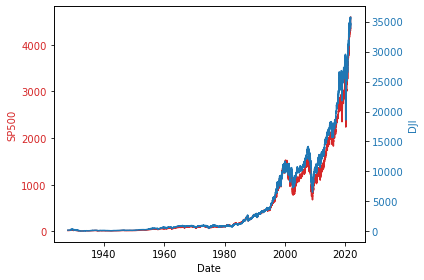

In [22]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('SP500', color=color)
ax1.plot(SP500.Date, SP500.Close, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('DJI', color=color)  # we already handled the x-label with ax1
ax2.plot(DJI.Date, DJI.Value, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [23]:
SP500['pct_change'] = SP500.Close.pct_change()
SP500['log_ret'] = np.log(SP500.Close) - np.log(SP500.Close.shift(1))
DJI['pct_change'] = DJI.Value.pct_change()
DJI['log_ret'] = np.log(DJI.Value) - np.log(DJI.Value.shift(1))

In [24]:
SP500

,Date,Close,pct_change,log_ret
0,1928-01-02,17.66,NaN,NaN
1,1928-01-03,17.76,0.005663,0.005647
2,1928-01-04,17.72,-0.002252,-0.002255
3,1928-01-05,17.55,-0.009594,-0.009640
4,1928-01-06,17.66,0.006268,0.006248
...,...,...,...,...
23571,2021-10-22,4544.90,-0.001073,-0.001073
23572,2021-10-25,4566.48,0.004748,0.004737
23573,2021-10-26,4574.79,0.001820,0.001818
23574,2021-10-27,4551.68,-0.005052,-0.005064


In [25]:
DJI

,Date,Value,pct_change,log_ret
24688,1928-01-03,203.35,NaN,NaN
24687,1928-01-04,202.24,-0.005459,-0.005474
24686,1928-01-05,199.61,-0.013004,-0.013090
24685,1928-01-06,201.45,0.009218,0.009176
24684,1928-01-07,201.97,0.002581,0.002578
...,...,...,...,...
4,2021-10-21,35603.08,-0.000176,-0.000176
3,2021-10-22,35677.02,0.002077,0.002075
2,2021-10-25,35741.15,0.001798,0.001796
1,2021-10-26,35756.88,0.000440,0.000440


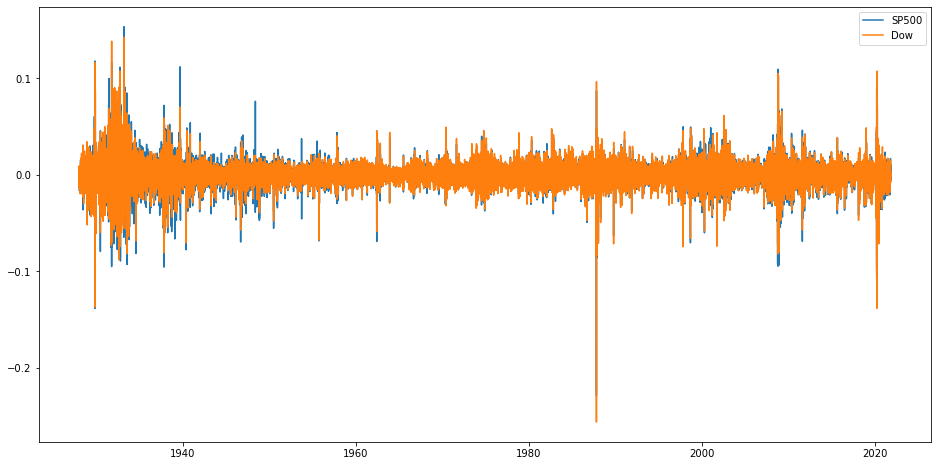

In [29]:
fig, ax = plt.subplots(figsize=(16, 8))

line1, = ax.plot(SP500.Date, SP500.log_ret, label='SP500')

line2, = ax.plot(DJI.Date, DJI.log_ret, label='Dow')

ax.legend()
plt.show()

In [30]:
SP500.describe()

,Close,pct_change,log_ret
count,23576.000000,23575.000000,23575.000000
mean,524.705004,0.000306,0.000236
std,811.430157,0.011800,0.011820
min,4.400000,-0.204669,-0.228997
25%,24.127500,-0.004501,-0.004511
50%,100.185000,0.000495,0.000495
75%,892.002500,0.005411,0.005397
max,4596.420000,0.166096,0.153661


In [31]:
SP500.log_ret.kurtosis()

19.098000225267015

In [32]:
SP500.log_ret.skew()

-0.47558490117478414

# Changes in U.S. Financial Market Risk

In [33]:
A = SP500[SP500.Date<'1929-03-04']
A

,Date,Close,pct_change,log_ret
0,1928-01-02,17.66,NaN,NaN
1,1928-01-03,17.76,0.005663,0.005647
2,1928-01-04,17.72,-0.002252,-0.002255
3,1928-01-05,17.55,-0.009594,-0.009640
4,1928-01-06,17.66,0.006268,0.006248
...,...,...,...,...
287,1929-02-25,24.91,0.002011,0.002009
288,1929-02-26,24.95,0.001606,0.001604
289,1929-02-27,25.25,0.012024,0.011952
290,1929-02-28,25.59,0.013465,0.013375


In [34]:
B = SP500[(SP500.Date>='1929-03-04') & (SP500.Date<'1933-03-04')]
B

,Date,Close,pct_change,log_ret
292,1929-03-04,25.49,-0.013163,-0.013250
293,1929-03-05,25.32,-0.006669,-0.006692
294,1929-03-06,24.92,-0.015798,-0.015924
295,1929-03-07,25.15,0.009230,0.009187
296,1929-03-08,25.31,0.006362,0.006342
...,...,...,...,...
1290,1933-02-27,5.53,-0.062712,-0.064765
1291,1933-02-28,5.66,0.023508,0.023236
1292,1933-03-01,5.77,0.019435,0.019248
1293,1933-03-02,5.65,-0.020797,-0.021017


In [35]:
C = SP500[(SP500.Date>='1933-03-04') & (SP500.Date<'1945-04-12')]
D = SP500[(SP500.Date>='1945-04-12') & (SP500.Date<'1953-01-20')]
E = SP500[(SP500.Date>='1953-01-20') & (SP500.Date<'1961-01-20')]
F = SP500[(SP500.Date>='1961-01-20') & (SP500.Date<'1963-11-22')]
G = SP500[(SP500.Date>='1963-11-22') & (SP500.Date<'1969-01-20')]
H = SP500[(SP500.Date>='1969-01-20') & (SP500.Date<'1974-08-09')]
I = SP500[(SP500.Date>='1974-08-09') & (SP500.Date<'1977-01-20')]
J = SP500[(SP500.Date>='1977-01-20') & (SP500.Date<'1981-01-20')]
K = SP500[(SP500.Date>='1981-01-20') & (SP500.Date<'1989-01-20')]
L = SP500[(SP500.Date>='1989-01-20') & (SP500.Date<'1993-01-20')]
M = SP500[(SP500.Date>='1993-01-20') & (SP500.Date<'2001-01-20')]
N = SP500[(SP500.Date>='2001-01-20') & (SP500.Date<'2009-01-20')]
O = SP500[(SP500.Date>='2009-01-20') & (SP500.Date<'2017-01-20')]
P = SP500[(SP500.Date>='2017-01-20') & (SP500.Date<'2021-01-20')]
Q = SP500[SP500.Date >= '2021-01-20']

In [36]:
A.describe()

,Close,pct_change,log_ret
count,292.000000,291.000000,291.000000
mean,20.633390,0.001354,0.001307
std,2.485232,0.009614,0.009636
min,16.950000,-0.037799,-0.038532
25%,18.890000,-0.003296,-0.003301
50%,19.885000,0.002317,0.002315
75%,22.485000,0.007177,0.007151
max,25.840000,0.029989,0.029548


In [37]:
A.skew()

Close         0.492876
pct_change   -0.727083
log_ret      -0.771304
dtype: float64

In [38]:
A.kurtosis()

Close        -0.889648
pct_change    1.596236
log_ret       1.705181
dtype: float64

In [42]:
print('B & ' + str(B.log_ret.count()) + ' & ' + str(B.log_ret.mean()) + ' & ' + str(B.log_ret.std()) + ' & ' + str(B.log_ret.skew()) + ' & ' + str(B.log_ret.kurtosis()) + ' & ' + str(B.log_ret.median()))

B & 1003 & -0.0014823587340654174 & 0.025958709846504443 & 0.0719049644827105 & 3.2579786402353395 & -0.0009389672051378639


In [43]:
print('C & ' + str(C.log_ret.count()) + ' & ' + str(C.log_ret.mean()) + ' & ' + str(C.log_ret.std()) + ' & ' + str(C.log_ret.skew()) + ' & ' + str(C.log_ret.kurtosis()) + ' & ' + str(C.log_ret.median()))

C & 3023 & 0.000290639460649151 & 0.015279789442050405 & 0.2013039548507062 & 9.195519883951874 & 0.0


In [44]:
print('D & ' + str(D.log_ret.count()) + ' & ' + str(D.log_ret.mean()) + ' & ' + str(D.log_ret.std()) + ' & ' + str(D.log_ret.skew()) + ' & ' + str(D.log_ret.kurtosis()) + ' & ' + str(D.log_ret.median()))

D & 1938 & 0.0003174134123209706 & 0.009042161308684928 & -0.7091271088179377 & 8.574332102373177 & 0.0006581123846904902


In [45]:
print('E & ' + str(E.log_ret.count()) + ' & ' + str(E.log_ret.mean()) + ' & ' + str(E.log_ret.std()) + ' & ' + str(E.log_ret.skew()) + ' & ' + str(E.log_ret.kurtosis()) + ' & ' + str(E.log_ret.median()))

E & 2019 & 0.00041209647517365154 & 0.0070413256317493345 & -0.6395403892303113 & 7.48465809049709 & 0.0007181328854404256


In [46]:
print('F & ' + str(F.log_ret.count()) + ' & ' + str(F.log_ret.mean()) + ' & ' + str(F.log_ret.std()) + ' & ' + str(F.log_ret.skew()) + ' & ' + str(F.log_ret.kurtosis()) + ' & ' + str(F.log_ret.median()))

F & 716 & 0.00025261243258955883 & 0.007310205777174699 & -1.0212405067022612 & 15.373059336755311 & 0.0005531044864572898


In [47]:
print('G & ' + str(G.log_ret.count()) + ' & ' + str(G.log_ret.mean()) + ' & ' + str(G.log_ret.std()) + ' & ' + str(G.log_ret.skew()) + ' & ' + str(G.log_ret.kurtosis()) + ' & ' + str(G.log_ret.median()))

G & 1272 & 0.00027821739238752106 & 0.005534425759190359 & 0.001425119730299679 & 4.572413663212428 & 0.0004375320801037752


In [48]:
print('H & ' + str(H.log_ret.count()) + ' & ' + str(H.log_ret.mean()) + ' & ' + str(H.log_ret.std()) + ' & ' + str(H.log_ret.skew()) + ' & ' + str(H.log_ret.kurtosis()) + ' & ' + str(H.log_ret.median()))

H & 1401 & -0.00015974685251586327 & 0.008184922045323477 & 0.20661163882923705 & 2.3066157158535767 & 0.0


In [49]:
print('I & ' + str(I.log_ret.count()) + ' & ' + str(I.log_ret.mean()) + ' & ' + str(I.log_ret.std()) + ' & ' + str(I.log_ret.skew()) + ' & ' + str(I.log_ret.kurtosis()) + ' & ' + str(I.log_ret.median()))

I & 619 & 0.00039012278353737096 & 0.010306778066713899 & 0.2837575875357682 & 1.4226955615093488 & 9.914241816488811e-05


In [50]:
print('J & ' + str(J.log_ret.count()) + ' & ' + str(J.log_ret.mean()) + ' & ' + str(J.log_ret.std()) + ' & ' + str(J.log_ret.skew()) + ' & ' + str(J.log_ret.kurtosis()) + ' & ' + str(J.log_ret.median()))

J & 1009 & 0.0002553514752876085 & 0.007945576208286361 & -0.030876286100958095 & 1.5195265685164183 & 0.00048484849434693444


In [51]:
print('K & ' + str(K.log_ret.count()) + ' & ' + str(K.log_ret.mean()) + ' & ' + str(K.log_ret.std()) + ' & ' + str(K.log_ret.skew()) + ' & ' + str(K.log_ret.kurtosis()) + ' & ' + str(K.log_ret.median()))

K & 2025 & 0.00037458594276543216 & 0.01135570783017636 & -4.145099571476037 & 86.66317201323203 & 0.0003592276643926695


In [52]:
print('L & ' + str(L.log_ret.count()) + ' & ' + str(L.log_ret.mean()) + ' & ' + str(L.log_ret.std()) + ' & ' + str(L.log_ret.skew()) + ' & ' + str(L.log_ret.kurtosis()) + ' & ' + str(L.log_ret.median()))

L & 1011 & 0.0004119793412751135 & 0.008472116556454056 & -0.43788800344982176 & 4.312048915552059 & 0.0004543733512480941


In [53]:
print('M & ' + str(M.log_ret.count()) + ' & ' + str(M.log_ret.mean()) + ' & ' + str(M.log_ret.std()) + ' & ' + str(M.log_ret.skew()) + ' & ' + str(M.log_ret.kurtosis()) + ' & ' + str(M.log_ret.median()))

M & 2021 & 0.0005574833172097876 & 0.00989762379527113 & -0.31523941683928786 & 5.294474185201558 & 0.0005647324730064796


In [54]:
print('N & ' + str(N.log_ret.count()) + ' & ' + str(N.log_ret.mean()) + ' & ' + str(N.log_ret.std()) + ' & ' + str(N.log_ret.skew()) + ' & ' + str(N.log_ret.kurtosis()) + ' & ' + str(N.log_ret.median()))

N & 2009 & -0.00022744704086956167 & 0.013560901226629937 & -0.15997283358846004 & 9.951075472836388 & 0.0004683475224158684


In [55]:
print('O & ' + str(O.log_ret.count()) + ' & ' + str(O.log_ret.mean()) + ' & ' + str(O.log_ret.std()) + ' & ' + str(O.log_ret.skew()) + ' & ' + str(O.log_ret.kurtosis()) + ' & ' + str(O.log_ret.median()))

O & 2015 & 0.00048604168147014316 & 0.010900106667793515 & -0.27096657710680727 & 4.7206897912757615 & 0.0006124941030121178


In [56]:
print('P & ' + str(P.log_ret.count()) + ' & ' + str(P.log_ret.mean()) + ' & ' + str(P.log_ret.std()) + ' & ' + str(P.log_ret.skew()) + ' & ' + str(P.log_ret.kurtosis()) + ' & ' + str(P.log_ret.median()))

P & 1006 & 0.000514630177245845 & 0.013008290974837255 & -1.1454443297480936 & 20.932266929224962 & 0.0008338817288389144


In [57]:
print('Q & ' + str(Q.log_ret.count()) + ' & ' + str(Q.log_ret.mean()) + ' & ' + str(Q.log_ret.std()) + ' & ' + str(Q.log_ret.skew()) + ' & ' + str(Q.log_ret.kurtosis()) + ' & ' + str(Q.log_ret.median()))

Q & 197 & 0.000967327696158691 & 0.008008911380054214 & -0.4425179558002758 & 1.044239794095133 & 0.0012559520255734924


In [58]:
import scipy

In [61]:
scipy.stats.jarque_bera(A.log_ret[1:])

Jarque_beraResult(statistic=61.78574316322883, pvalue=3.83026943495679e-14)

In [62]:
scipy.stats.jarque_bera(B.log_ret)

Jarque_beraResult(statistic=438.43293707523037, pvalue=0.0)

In [63]:
scipy.stats.jarque_bera(C.log_ret)

Jarque_beraResult(statistic=10631.354266361826, pvalue=0.0)

In [64]:
scipy.stats.jarque_bera(D.log_ret)

Jarque_beraResult(statistic=6064.001314359962, pvalue=0.0)

In [65]:
scipy.stats.jarque_bera(E.log_ret)

Jarque_beraResult(statistic=4823.092367812262, pvalue=0.0)

In [66]:
scipy.stats.jarque_bera(F.log_ret)

Jarque_beraResult(statistic=7068.9188371590335, pvalue=0.0)

In [67]:
scipy.stats.jarque_bera(G.log_ret)

Jarque_beraResult(statistic=1097.1108310822924, pvalue=0.0)

In [68]:
scipy.stats.jarque_bera(H.log_ret)

Jarque_beraResult(statistic=317.1711751285728, pvalue=0.0)

In [69]:
scipy.stats.jarque_bera(I.log_ret)

Jarque_beraResult(statistic=58.93039895647263, pvalue=1.5976109324356003e-13)

In [70]:
scipy.stats.jarque_bera(J.log_ret)

Jarque_beraResult(statistic=95.520285322047, pvalue=0.0)

In [71]:
scipy.stats.jarque_bera(K.log_ret)

Jarque_beraResult(statistic=636322.6177543376, pvalue=0.0)

In [72]:
scipy.stats.jarque_bera(L.log_ret)

Jarque_beraResult(statistic=805.6163773117987, pvalue=0.0)

In [73]:
scipy.stats.jarque_bera(M.log_ret)

Jarque_beraResult(statistic=2379.6097962606113, pvalue=0.0)

In [74]:
scipy.stats.jarque_bera(N.log_ret)

Jarque_beraResult(statistic=8251.542022125823, pvalue=0.0)

In [75]:
scipy.stats.jarque_bera(O.log_ret)

Jarque_beraResult(statistic=1884.0052189346127, pvalue=0.0)

In [76]:
scipy.stats.jarque_bera(P.log_ret)

Jarque_beraResult(statistic=18393.265639009875, pvalue=0.0)

In [77]:
scipy.stats.jarque_bera(Q.log_ret)

Jarque_beraResult(statistic=14.338116519342238, pvalue=0.0007700475747226543)

/Users/Enzo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Enzo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Enzo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

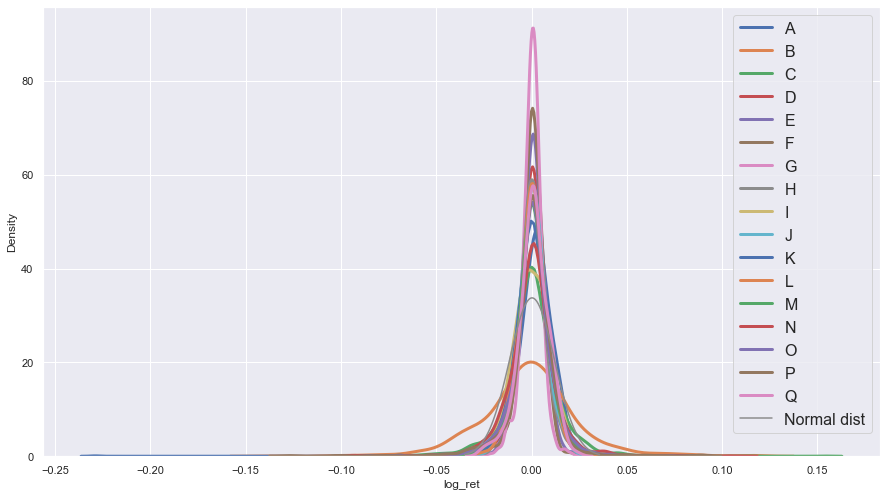

In [82]:
import scipy.stats as stats
lab = 'A'
sns.set(rc={'figure.figsize':(15,8.27)})
for sec in [A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q]:
    sns.distplot(sec['log_ret'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = lab)
    lab = chr(ord(lab) + 1)
mu = 0.000236
sigma = 0.011820
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label = 'Normal dist')
# Plot formatting
plt.legend(prop={'size': 16})

In [84]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(SP500.log_ret[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -22.004199
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [85]:
import statsmodels.api as sm
res = sm.tsa.ARMA(SP500.log_ret[1:], (1,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[10], return_df=True)

/Users/Enzo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


,lb_stat,lb_pvalue
10,44.250094,0.000003


In [90]:
import pmdarima
import arch

# fit ARIMA on returns 
arima_model_fitted = pmdarima.auto_arima(SP500.log_ret[1:])
p, d, q = arima_model_fitted.order
arima_residuals = arima_model_fitted.arima_res_.resid

# fit a GARCH(1,1) model on the residuals of the ARIMA model
garch = arch.arch_model(arima_residuals, p=1, q=1)
garch_fitted = garch.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: -77531.35210283072
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -77531.35222418117
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1


/Users/Enzo/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001396. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/Enzo/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [91]:
p

2

In [92]:
d

0

In [93]:
q

2

In [94]:
garch_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                77531.4
Distribution:                  Normal   AIC:                          -155055.
Method:            Maximum Likelihood   BIC:                          -155022.
                                        No. Observations:                23575
Date:                Sun, Oct 31 2021   Df Residuals:                    23574
Time:                        11:45:12   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.3723e-06  4.920e-05  8.887e-02      0.929 [-9.205e-05,1.008e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.7928e-06  6.593e-13  4.236e+06      0.000 [2.793e-06,2.793e-06]
alpha[1]       0.1000  1.067e-03     93.753      0.000   [9.791e-02,  0.102]
beta[1]        0.8800  1.955e-03    450.143      0.000     [  0.876,  0.884]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Inequality constraints incompatible.
See convergence_flag.

"""

In [95]:
arima_model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                23575
Model:               SARIMAX(2, 0, 2)   Log Likelihood               71179.517
Date:                Sun, 31 Oct 2021   AIC                        -142347.035
Time:                        11:51:12   BIC                        -142298.627
Sample:                             0   HQIC                       -142331.322
                              - 23575                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.000      2.717      0.007       0.000       0.001
ar.L1         -0.1836      0.112     -1.636      0.102      -0.404       0.036
ar.L2         -0.4552      0.119     -3.833      0.000      -0.688      -0.222
ma.L1          0.1852      0.113      1.636      0.102      -0.037       0.407
ma.L2          0.4376      0.120      3.654      0.000       0.203       0.672
sigma2         0.0001   4.01e-07    347.993      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            358768.05
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [131]:
from scipy.stats import norm
VaR = []
ES = []
for i in range(1, len(SP500.log_ret) - 252):
    h = 252
    mu = np.mean(SP500.log_ret[i:i + 252])
    sig = np.std(SP500.log_ret[i:i + 252])
    alpha = 0.05
    VaR_95 = norm.ppf(1-alpha)*sig - mu
    VaR.append(VaR_95)
    CVaR_n = alpha**-1 * norm.pdf(norm.ppf(alpha))*sig - mu
    ES.append(CVaR_n)

In [132]:
VaR

[0.014120344338490154,
 0.014138988079207718,
 0.014450754499467304,
 0.014392079213147254,
 0.014414311383450507,
 0.014334583671960666,
 0.014287893302314655,
 0.014273199015255214,
 0.014437068154032633,
 0.014450734115287304,
 0.014258339866814821,
 0.014248684541492472,
 0.014221931140501473,
 0.014222364409078831,
 0.01422214609141291,
 0.014284092421954525,
 0.014310589178212051,
 0.014251690641218782,
 0.01426746062757435,
 0.014267085830256996,
 0.01415358848593895,
 0.014155048685739914,
 0.014201414172091717,
 0.014208961239389082,
 0.01414835125423816,
 0.014640858624373306,
 0.014731930424359599,
 0.014795298395342101,
 0.014814557135563074,
 0.01483663424903434,
 0.015033021958399638,
 0.015013106696998214,
 0.014998471736608539,
 0.014785455063435959,
 0.0147352997490585,
 0.014744121467519905,
 0.014742359947160097,
 0.014741860092788224,
 0.014708066816491904,
 0.014701674281574185,
 0.014843680637146556,
 0.014901338048424966,
 0.015062585694431946,
 0.015042870357778

In [133]:
ES

[0.018052208053638358,
 0.018069490205387242,
 0.01843809189742147,
 0.018370897590408088,
 0.018407794044196315,
 0.018318629132952593,
 0.018265952345625763,
 0.018250738415481388,
 0.018434420769363892,
 0.018458867943292136,
 0.018239688005623103,
 0.018230258087025764,
 0.01820269800852538,
 0.018204736747139905,
 0.018204692983340744,
 0.01826677481605434,
 0.01831276580425808,
 0.01824462184628759,
 0.01825848605141376,
 0.018258162316953097,
 0.018138716544947586,
 0.018139856002612396,
 0.018192464892279055,
 0.018198551150310986,
 0.018127510692474088,
 0.01871091230280451,
 0.01881462204340198,
 0.018913233301957714,
 0.018932720738121286,
 0.01895693232064453,
 0.019188483818759712,
 0.019167478733444255,
 0.019151613493609967,
 0.01891130312465104,
 0.01886475354822768,
 0.01886837052660466,
 0.01886660130979106,
 0.01887508537643985,
 0.018850306920810585,
 0.01884875933040003,
 0.01900762571985646,
 0.01907085108121475,
 0.019257009301759727,
 0.01922593527404287,
 0.019

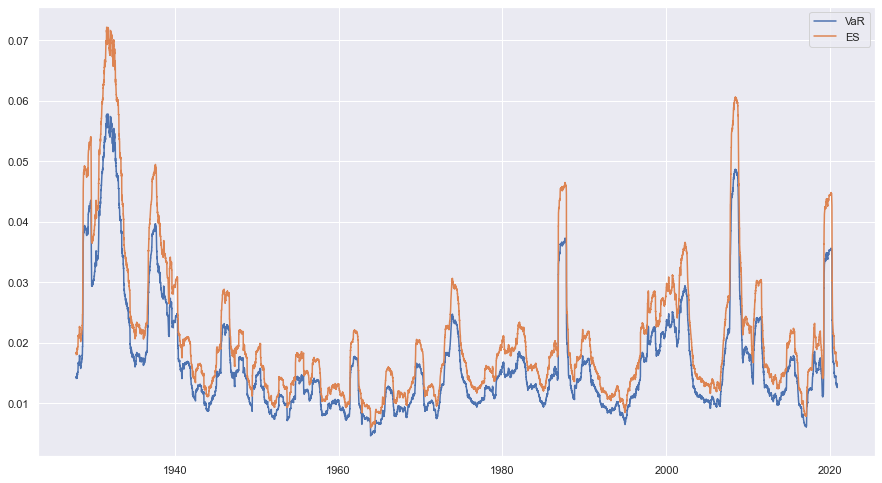

In [135]:
plt.plot(SP500.Date[1:len(SP500.log_ret) - 252], VaR, label = 'VaR')
plt.plot(SP500.Date[1:len(SP500.log_ret) - 252], ES, label = 'ES')
plt.legend()
plt.show()

# Analysis of the Changing Trend of Financial Risk and its Rea-sons

In [141]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(ES, model='multiplicable', period=252)

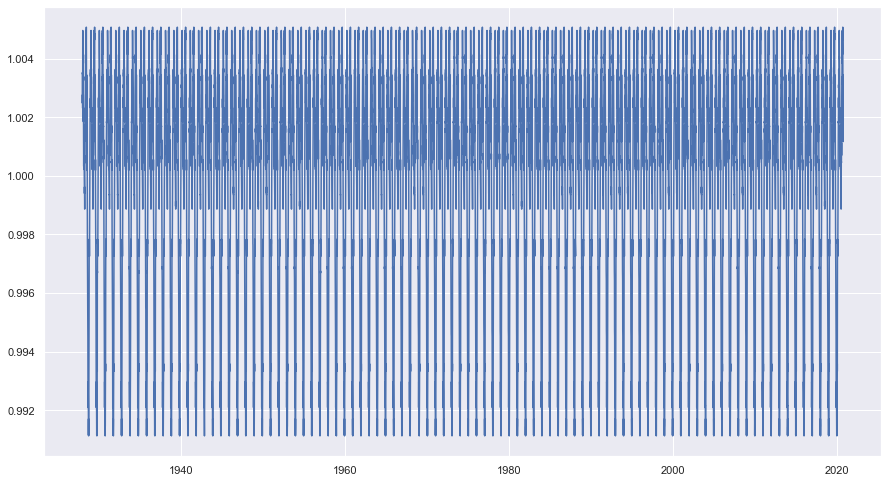

In [146]:
plt.plot(SP500.Date[1:len(SP500.log_ret) - 252], result.seasonal)

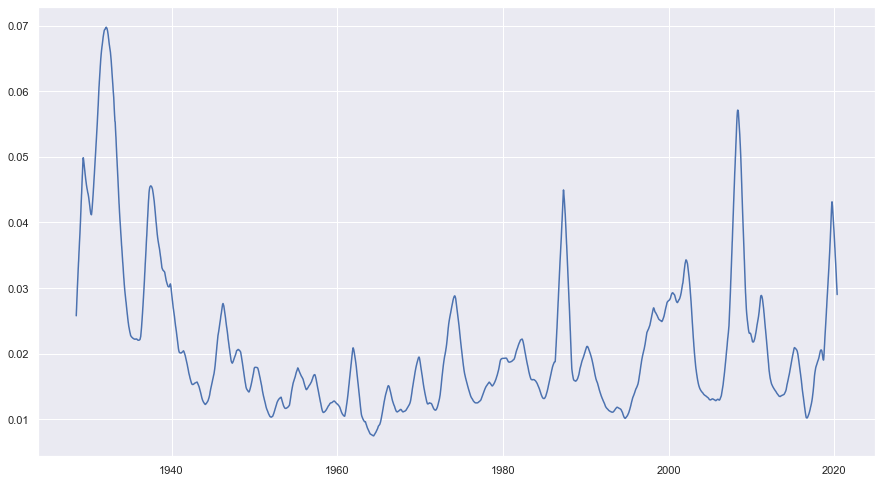

In [147]:
plt.plot(SP500.Date[1:len(SP500.log_ret) - 252], result.trend)

In [159]:
n = len(ES)
X = range(1, n+1)
z1 = np.polyfit(X, ES, 1)
z1

array([-3.61543571e-07,  2.53567281e-02])

In [160]:
z2 = np.polyfit(X, ES, 2)
z2

array([ 1.51478165e-10, -3.89462029e-06,  3.90915638e-02])

In [164]:
def logfunc(x,a,b):
    return a*np.log(x) + b

popt,pcov=curve_fit(logfunc,X, ES)
popt

array([-0.00494221,  0.06590427])

In [158]:
def ordfunc(x,a,b):
    return a*x**b

popt,pcov=curve_fit(ordfunc,X, ES)
popt

<ipython-input-158-c160b660171a>:2: RuntimeWarning: divide by zero encountered in power
  return a*x**b


array([2.11402984e-02, 6.99672104e-08])